In [1]:
import pandas as pd
import random
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("./Superstore.csv", encoding='unicode_escape')

data = data.dropna()

label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

processed_data = data

Best solution: {'discount': 0.29820992957540216, 'price': np.float64(43.845351154231025)}


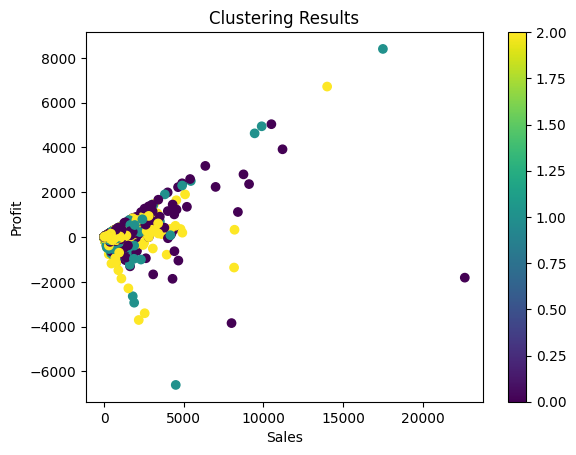

In [ ]:
class GeneticAlgorithm:
    def __init__(self, data, population_size, generations, mutation_rate):
        self.data = data
        self.population_size = population_size
        self.generations = generations
        self.mutation_rate = mutation_rate
        self.population = self.initialize_population()

    def initialize_population(self):
        return [self.random_solution() for _ in range(self.population_size)]

    def random_solution(self):
        return {
            "discount": random.uniform(0, 1),
            "price": random.uniform(self.data['Sales'].min(), self.data['Sales'].max())
        }

    def fitness(self, solution):
        discount = solution['discount']
        price = solution['price']
        profit = self.data[(self.data['Discount'] <= discount) & (self.data['Sales'] >= price)]['Profit'].sum()
        return profit

    def select_parents(self):
        fitness_scores = [(sol, self.fitness(sol)) for sol in self.population]
        fitness_scores.sort(key=lambda x: x[1], reverse=True)
        return [sol for sol, _ in fitness_scores[:2]]

    def crossover(self, parent1, parent2):
        child = {
            "discount": (parent1['discount'] + parent2['discount']) / 2,
            "price": (parent1['price'] + parent2['price']) / 2
        }
        return child

    def mutate(self, solution):
        if random.random() < self.mutation_rate:
            solution['discount'] += random.uniform(-0.15, 0.15)
            solution['price'] += random.uniform(-15, 15)
        return solution

    def evolve(self):
        for _ in range(self.generations):
            parents = self.select_parents()
            children = [self.crossover(parents[0], parents[1]) for _ in range(self.population_size - 2)]
            self.population = parents + [self.mutate(child) for child in children]
        return max(self.population, key=self.fitness)

ga = GeneticAlgorithm(processed_data, population_size=30, generations=60, mutation_rate=0.15)
best_solution = ga.evolve()
print("Best solution:", best_solution)

#  Clustering with k-means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(processed_data)
processed_data['Cluster'] = kmeans.labels_

#  Visualization
plt.scatter(processed_data['Sales'], processed_data['Profit'], c=processed_data['Cluster'], cmap='viridis')
plt.title('Clustering Results')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.colorbar()
plt.show()

# 
